In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [4]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

saldanha za
torbay ca
ancud cl
bluff nz
tuatapere nz
ushuaia ar
rungata ki
port-cartier ca
georgetown sh
bosaso so
kabanjahe id
rikitea pf
tigzirt dz
port-cartier ca
punta arenas cl
amapa br
souillac mu
san lorenzo ar
olafsvik is
torbay ca
dunedin nz
ushuaia ar
cape town za
lincoln nz
provideniya ru
kitimat ca
nizhneyansk ru
taolanaro mg
punta arenas cl
dhidhdhoo mv
lebu cl
raudeberg no
jamestown sh
ostrovnoy ru
gouyave gd
couvin be
nuuk gl
harper lr
taolanaro mg
ushuaia ar
busselton au
yellowknife ca
tuatapere nz
mataura pf
busselton au
hobart au
bluff nz
tasiilaq gl
lazurne ua
salalah om
westerly us
kapaa us
hay river ca
kyra ru
castro cl
mataura pf
deputatskiy ru
coihaique cl
itanagar in
ust-kuyga ru
bethel us
namibe ao
podporozhye ru
mentok id
barrow us
punta arenas cl
henderson us
korla cn
vaini to
dikson ru
punta arenas cl
koungou yt
atuona pf
high level ca
barrow us
tura ru
provideniya ru
santa maria cv
kapaa us
chokurdakh ru
barentsburg sj
ayan ru
lagoa pt
cape town za
jieshi c

rikitea pf
hermanus za
bluff nz
belushya guba ru
dutlwe bw
kapaa us
misratah ly
yeppoon au
laurel us
labuhan id
mataura pf
hithadhoo mv
jamestown sh
marcona pe
matveyevka ru
mataura pf
tuktoyaktuk ca
vila franca do campo pt
ahipara nz
gbadolite cd
taolanaro mg
puerto ayora ec
nikolskoye ru
busselton au
faanui pf
yellowknife ca
bengkulu id
hithadhoo mv
punta arenas cl
mataura pf
puerto ayora ec
illoqqortoormiut gl
mataura pf
carnarvon au
tsihombe mg
takayama jp
jamestown us
tidore id
ponta do sol cv
ilulissat gl
poso id
avarua ck
hobyo so
sobolevo ru
avarua ck
coolum beach au
barra patuca hn
thaton mm
punta arenas cl
vaini to
huarmey pe
illoqqortoormiut gl
khatanga ru
dingle ie
kapaa us
fukuma jp
mar del plata ar
pampierstad za
busselton au
rikitea pf
liberty us
tuy hoa vn
ponta delgada pt
ushuaia ar
albany au
qaanaaq gl
upernavik gl
taolanaro mg
mataura pf
lebu cl
manaure co
busselton au
puerto ayora ec
rikitea pf
thompson ca
albany au
lavrentiya ru
rikitea pf
constitucion mx
cape town

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

604

In [9]:
import requests
requests.__version__

'2.24.0'

In [13]:
# Import the datetime module from the datetime library.
from datetime import datetime
from config import weather_api_key

In [14]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3f5e29c0874ff159b3fd5f72bfe29700


In [15]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saldanha
Processing Record 2 of Set 1 | torbay
Processing Record 3 of Set 1 | ancud
Processing Record 4 of Set 1 | bluff
Processing Record 5 of Set 1 | tuatapere
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | rungata
City not found. Skipping...
Processing Record 8 of Set 1 | port-cartier
Processing Record 9 of Set 1 | georgetown
Processing Record 10 of Set 1 | bosaso
Processing Record 11 of Set 1 | kabanjahe
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | tigzirt
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | amapa
Processing Record 16 of Set 1 | souillac
Processing Record 17 of Set 1 | san lorenzo
Processing Record 18 of Set 1 | olafsvik
Processing Record 19 of Set 1 | dunedin
Processing Record 20 of Set 1 | cape town
Processing Record 21 of Set 1 | lincoln
Processing Record 22 of Set 1 | provideniya
Processing Record 2

Processing Record 40 of Set 4 | ponta do sol
Processing Record 41 of Set 4 | port macquarie
Processing Record 42 of Set 4 | port augusta
Processing Record 43 of Set 4 | torres
Processing Record 44 of Set 4 | guilin
Processing Record 45 of Set 4 | houma
Processing Record 46 of Set 4 | ambodifototra
City not found. Skipping...
Processing Record 47 of Set 4 | chiredzi
Processing Record 48 of Set 4 | baruun-urt
Processing Record 49 of Set 4 | zhuanghe
Processing Record 50 of Set 4 | thompson
Processing Record 1 of Set 5 | airai
Processing Record 2 of Set 5 | tutoia
Processing Record 3 of Set 5 | sorong
Processing Record 4 of Set 5 | anjozorobe
Processing Record 5 of Set 5 | hualmay
Processing Record 6 of Set 5 | ajdabiya
Processing Record 7 of Set 5 | mwanza
Processing Record 8 of Set 5 | da nang
Processing Record 9 of Set 5 | krasnoyarsk-45
City not found. Skipping...
Processing Record 10 of Set 5 | midland
Processing Record 11 of Set 5 | longyearbyen
Processing Record 12 of Set 5 | wadda

Processing Record 28 of Set 8 | constitucion
Processing Record 29 of Set 8 | bathsheba
Processing Record 30 of Set 8 | turangi
Processing Record 31 of Set 8 | derzhavinsk
Processing Record 32 of Set 8 | khasan
Processing Record 33 of Set 8 | carutapera
Processing Record 34 of Set 8 | bandarbeyla
Processing Record 35 of Set 8 | kalmunai
Processing Record 36 of Set 8 | kafanchan
Processing Record 37 of Set 8 | praia
Processing Record 38 of Set 8 | gospic
Processing Record 39 of Set 8 | osmena
Processing Record 40 of Set 8 | camana
Processing Record 41 of Set 8 | maryville
Processing Record 42 of Set 8 | grand river south east
City not found. Skipping...
Processing Record 43 of Set 8 | saint anthony
Processing Record 44 of Set 8 | pundaguitan
Processing Record 45 of Set 8 | soanierana ivongo
Processing Record 46 of Set 8 | umzimvubu
City not found. Skipping...
Processing Record 47 of Set 8 | machiques
Processing Record 48 of Set 8 | yurga
Processing Record 49 of Set 8 | carbonia
Processin

Processing Record 13 of Set 12 | road town
Processing Record 14 of Set 12 | yumen
Processing Record 15 of Set 12 | amga
Processing Record 16 of Set 12 | mogadishu
Processing Record 17 of Set 12 | ginir
Processing Record 18 of Set 12 | ergani
Processing Record 19 of Set 12 | beipiao
Processing Record 20 of Set 12 | upata
Processing Record 21 of Set 12 | yamada
Processing Record 22 of Set 12 | mackay
Processing Record 23 of Set 12 | san andres del rabanedo
Processing Record 24 of Set 12 | otorohanga
Processing Record 25 of Set 12 | shirokiy
Processing Record 26 of Set 12 | guaymas
Processing Record 27 of Set 12 | norman wells
Processing Record 28 of Set 12 | naifaru
Processing Record 29 of Set 12 | maragogi
Processing Record 30 of Set 12 | chhatarpur
Processing Record 31 of Set 12 | bhandara
Processing Record 32 of Set 12 | belmonte
Processing Record 33 of Set 12 | indiana
Processing Record 34 of Set 12 | malartic
Processing Record 35 of Set 12 | duz
City not found. Skipping...
Processin

In [16]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saldanha,-33.0117,17.9442,57.20,62,100,1.14,ZA,2021-03-08 22:09:04
1,Torbay,47.6666,-52.7314,28.00,63,75,6.91,CA,2021-03-08 22:09:05
2,Ancud,-41.8697,-73.8203,64.00,58,0,6.91,CL,2021-03-08 22:09:05
3,Bluff,-46.6000,168.3333,62.01,71,83,4.00,NZ,2021-03-08 22:09:06
4,Tuatapere,-46.1333,167.6833,62.01,71,77,4.00,NZ,2021-03-08 22:09:06
5,Ushuaia,-54.8000,-68.3000,60.80,48,40,16.11,AR,2021-03-08 22:09:06
6,Port-Cartier,50.0334,-66.8654,27.00,68,20,9.22,CA,2021-03-08 22:09:07
7,Georgetown,5.4112,100.3354,79.00,83,20,2.30,MY,2021-03-08 22:06:17
8,Bosaso,11.2842,49.1816,76.21,78,4,3.09,SO,2021-03-08 22:09:07
9,Kabanjahe,3.1001,98.4908,75.20,100,20,3.44,ID,2021-03-08 22:09:08


In [19]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [20]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [21]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1615242498.2048907

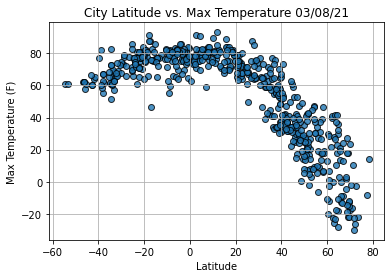

In [22]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

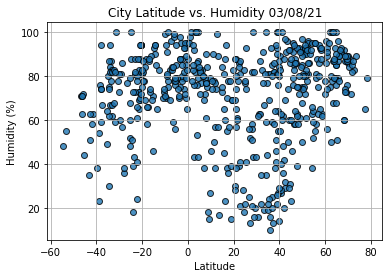

In [23]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

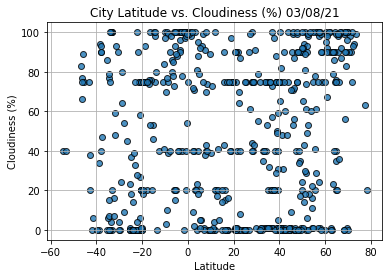

In [24]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

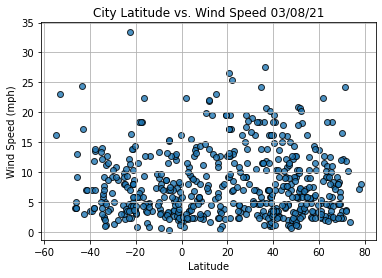

In [25]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [27]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [28]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Torbay,47.6666,-52.7314,28.00,63,75,6.91,CA,2021-03-08 22:09:05
6,Port-Cartier,50.0334,-66.8654,27.00,68,20,9.22,CA,2021-03-08 22:09:07
7,Georgetown,5.4112,100.3354,79.00,83,20,2.30,MY,2021-03-08 22:06:17
8,Bosaso,11.2842,49.1816,76.21,78,4,3.09,SO,2021-03-08 22:09:07
9,Kabanjahe,3.1001,98.4908,75.20,100,20,3.44,ID,2021-03-08 22:09:08


In [29]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

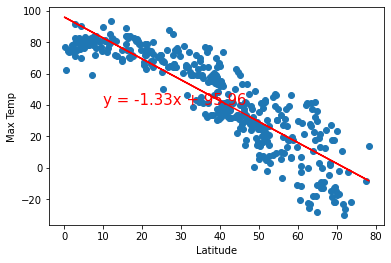

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

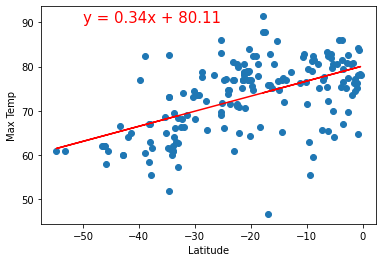

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

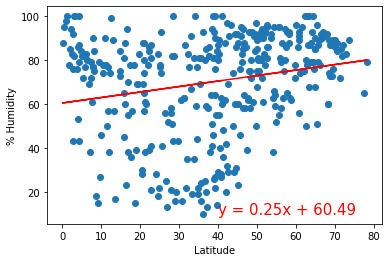

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

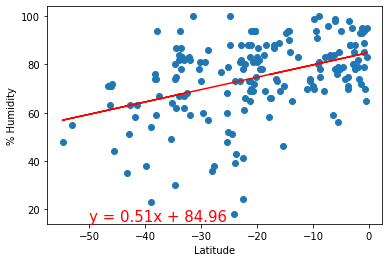

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

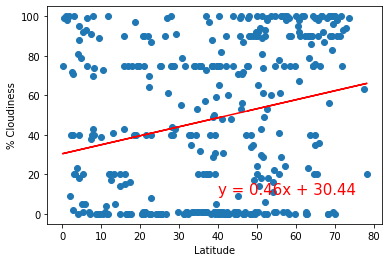

In [45]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

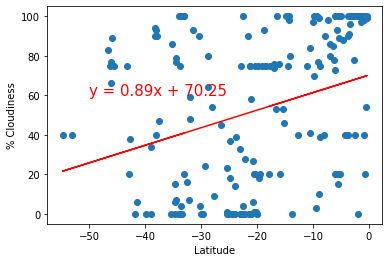

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

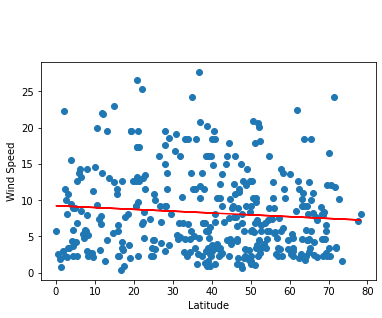

In [48]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

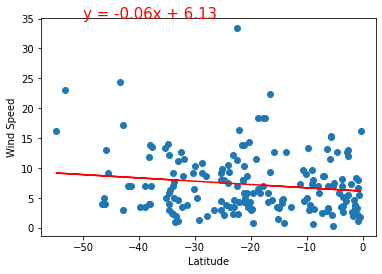

In [50]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))